# Anyone AI

# Project III - Home Credit Default Risk

You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all together. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. The competition finished 4 years ago, so you will find a lot of blog posts and code written for it, we encourage you to read everything you can about it.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
import warnings
import time

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
application_train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sprint 3/Archivos/application_train.csv")
application_test_df  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sprint 3/Archivos/application_test.csv") 

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1- Show the shape of the training and test datasets.

In [ ]:
print("The shape of the testing dataset is:",application_test_df.shape)
print("The shape of the training dataset is:",application_train_df.shape)

The shape of the testing dataset is: (48744, 121)
The shape of the training dataset is: (307511, 122)


2- List all columns in the train dataset

In [ ]:
IPython.display.HTML(pd.DataFrame(application_train_df.columns).to_html())

,0
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR
5,FLAG_OWN_REALTY
6,CNT_CHILDREN
7,AMT_INCOME_TOTAL
8,AMT_CREDIT
9,AMT_ANNUITY


3- Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [ ]:
application_train_df_transposed = application_train_df.T
application_train_df_transposed.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N


4- Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

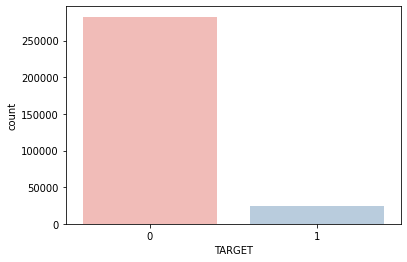

In [ ]:
#Total value count
sns.countplot(data=application_train_df, x='TARGET', palette='Pastel1')
plt.show()

In [ ]:
freq = application_train_df['TARGET'].value_counts() 
zeros = freq[0]
ones  = freq[1]
total = len(application_train_df)
a = zeros/total
b = ones/total
print("The total value of 0 is of",zeros)
print("The total value of 1 is of",ones)
print("The percentage of the value 0 is of",round(a,4)*100,"%")
print("The percentage of the value 1 is of",round(b,4)*100,"%")

The total value of 0 is of 282686
The total value of 1 is of 24825
The percentage of the value 0 is of 91.93 %
The percentage of the value 1 is of 8.07 %


5- Show the number of columns of each data type

In [ ]:
application_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


6- For categorical variables, show the number of distinct values in each column (number of labels)

In [ ]:
all_features = application_train_df.columns

#Categorical features
categorical_features =["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]	

#Numerical features
difference_1 = set(all_features).difference(set(categorical_features))
difference_2 = set(categorical_features).difference(set(all_features))
numerical_features = list(difference_1.union(difference_2))

print("There are",len(all_features),"features, where",len(numerical_features),"are numrical and",len(categorical_features),"categorical.")

There are 122 features, where 72 are numrical and 50 categorical.


In [ ]:
#Show number of unique values per categorical column
for i in range(len(categorical_features)):
  values = application_train_df[str(categorical_features[i])].unique()
  for j in range(len(values)):
    if values[j] == "nan":
      values.pop(int(j))

  print("The uniques categorical values for the columns",categorical_features[i],"are",len(values),"\n")

The uniques categorical values for the columns NAME_CONTRACT_TYPE are 2 

The uniques categorical values for the columns CODE_GENDER are 3 

The uniques categorical values for the columns FLAG_OWN_CAR are 2 

The uniques categorical values for the columns FLAG_OWN_REALTY are 2 

The uniques categorical values for the columns NAME_TYPE_SUITE are 8 

The uniques categorical values for the columns NAME_INCOME_TYPE are 8 

The uniques categorical values for the columns NAME_EDUCATION_TYPE are 5 

The uniques categorical values for the columns NAME_FAMILY_STATUS are 6 

The uniques categorical values for the columns NAME_HOUSING_TYPE are 6 

The uniques categorical values for the columns OCCUPATION_TYPE are 19 

The uniques categorical values for the columns WEEKDAY_APPR_PROCESS_START are 7 

The uniques categorical values for the columns ORGANIZATION_TYPE are 58 

The uniques categorical values for the columns FONDKAPREMONT_MODE are 5 

The uniques categorical values for the columns HOUSET

7- Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [ ]:
vacios = application_train_df.isna().sum()
vacios_sort = vacios.sort_values(ascending= False) 
vacios_sort_head = vacios_sort.head(20)
vacios_sort_head_per = (vacios_sort_head/len(application_train_df))
vacios_sort_head_per

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
dtype: float64

In [ ]:
#Print to see the whole Missing values columns list
IPython.display.HTML(pd.DataFrame(application_train_df.isna().sum()).to_html())

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


**Analyzing distribution of variables**

1- Show the distribution of credit amounts

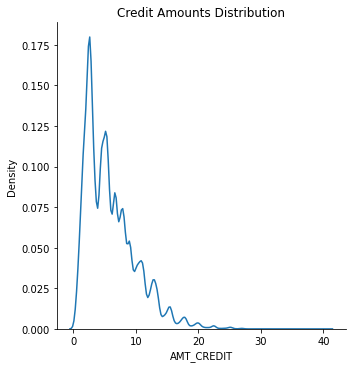

In [ ]:
#Distribution of credit amounts
sns.displot(data=application_train_df, x=application_train_df["AMT_CREDIT"]/100000, kind="kde").set(title='Credit Amounts Distribution') #by 100k
plt.show()

2- Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

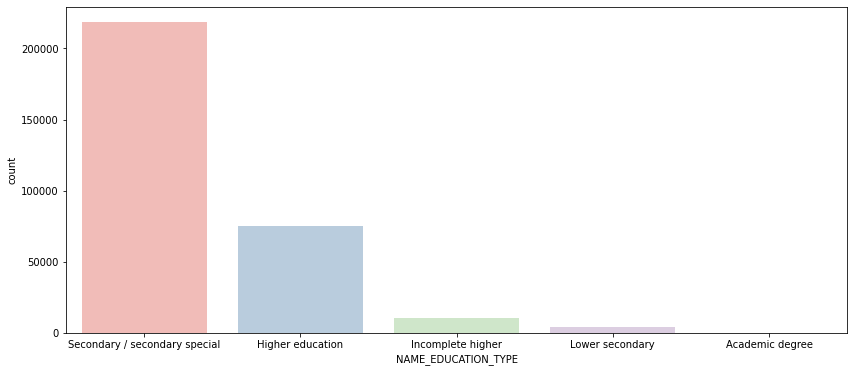

In [ ]:
### Complete in this cell: level of education plot
plt.figure(figsize=(14,6))
sns.countplot(data=application_train_df, x='NAME_EDUCATION_TYPE', palette='Pastel1')
plt.show()

In [ ]:
freq_0 = application_train_df['NAME_EDUCATION_TYPE'].value_counts() 
secondary     = freq_0[0]
higher_ed     = freq_0[1]
inc_higher    = freq_0[2] 
low_secondary = freq_0[3]
academic_deg  = freq_0[4]

a = secondary/total
b = higher_ed/total
c = inc_higher/total
d = low_secondary/total
e = academic_deg/total

print("The total value of persons with the Secondary school as it maximum educational level is of",secondary,"with a percentage of",round(a,3)*100,"%")
print("The total value of persons with Higher education as it maximum educational level is of",higher_ed,"with a percentage of",round(b,4)*100,"%")
print("The total value of persons with Incomplete Higher education as it maximum educational level is of",inc_higher,"with a percentage of",round(c,4)*100,"%")
print("The total value of persons without having finished Secondary school as it maximum educational level is of",low_secondary,"with a percentage of",round(d,4)*100,"%")
print("The total value of persons with an Academical degree as it maximum educational level is of",academic_deg,"with a percentage of",round(e,4)*100,"%")

The total value of persons with the Secondary school as it maximum educational level is of 218391 with a percentage of 71.0 %
The total value of persons with Higher education as it maximum educational level is of 74863 with a percentage of 24.34 %
The total value of persons with Incomplete Higher education as it maximum educational level is of 10277 with a percentage of 3.34 %
The total value of persons without having finished Secondary school as it maximum educational level is of 3816 with a percentage of 1.24 %
The total value of persons with an Academical degree as it maximum educational level is of 164 with a percentage of 0.05 %


3- Plot the distribution of ocupation of the loan applicants

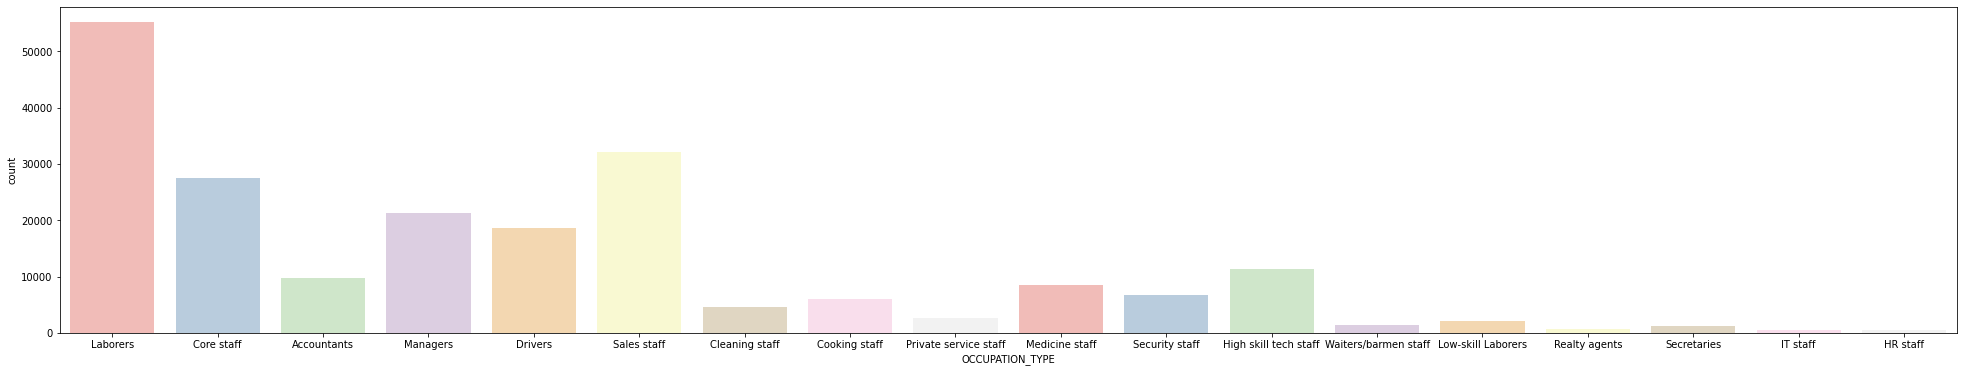

In [ ]:
#Distribution pf the applicant´s occupations
plt.figure(figsize=(34,6))
sns.countplot(data=application_train_df, x="OCCUPATION_TYPE", palette='Pastel1')
plt.show()

4- Plot the family status of the applicants

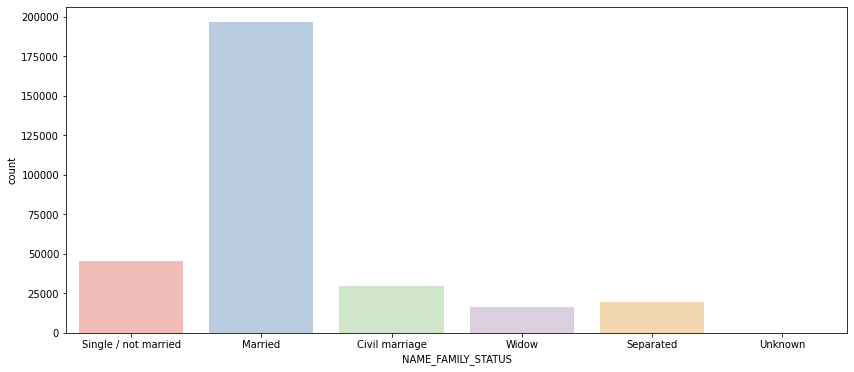

In [ ]:
#Family status
plt.figure(figsize=(14,6))
sns.countplot(data=application_train_df, x="NAME_FAMILY_STATUS", palette='Pastel1')
plt.show()

5- Plot the income type of applicants grouped by the target variable

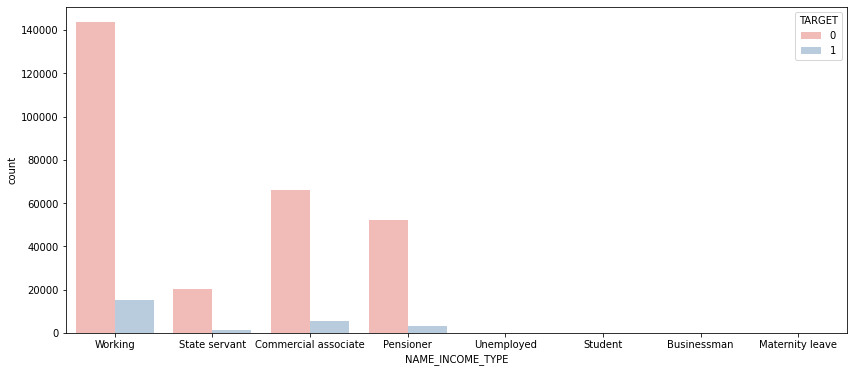

In [ ]:
#Income type of applicants by target variable
plt.figure(figsize=(14,6))
sns.countplot(data=application_train_df, x="NAME_INCOME_TYPE", hue="TARGET", palette='Pastel1')
plt.show()

## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

In [ ]:
prueba_train = application_train_df
prueba_test = application_test_df

In [ ]:
"""OBS:It has to be taken a particular consideration to the feature DAYS_EMPLOYED, if we take a look into that columns there is a 
particularity that there are a lot of clients with the value of 365243..."""
count = 0
for index, columns in prueba_train.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    count = count + 1

count1 = 0
for index, columns in prueba_test.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    count1 = count1 + 1

print("There are",count,"clients with 365243 as a value")
print("There are",count1,"clients with 365243 as a value")

"""So, just in this example it represents a little bit less than the 20% of the whole dataframe, there are so much errors that the
outliers can not be detected, so I have to directly eliminate them before even starting the outliers detection part..."""

for index, columns in prueba_train.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    prueba_train.loc[index, "DAYS_EMPLOYED" ] = np.nan

for index, columns in prueba_test.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    prueba_test.loc[index, "DAYS_EMPLOYED" ] = np.nan

count = 0
for index, columns in prueba_train.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    count = count + 1
count1 = 0
for index, columns in prueba_test.iterrows():
  if columns["DAYS_EMPLOYED"] == 365243:
    count1 = count1 + 1

print("There are",count,"clients with 365243 as a value")
print("There are",count1,"clients with 365243 as a value")


There are 55374 clients with 365243 as a value
There are 9274 clients with 365243 as a value
There are 0 clients with 365243 as a value
There are 0 clients with 365243 as a value


Correcting Outliers

In [ ]:
def outliers(dataframe, feat):
  Q1  = dataframe[feat].quantile(0.10)
  Q3  = dataframe[feat].quantile(0.90)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  ls = dataframe.index[(dataframe[feat] < lower_bound) | (dataframe[feat] > upper_bound)]
  warnings.filterwarnings('ignore')

  return ls

In [ ]:
def fill_with_empty(dataframe, feat, indexs):
  for j in range(len(indexs)): 
    dataframe.loc[indexs[j], feat] = np.nan
    warnings.filterwarnings('ignore')

  return

In [ ]:
def detecting_filling(dataframe):
  for i in range(len(numerical_features)):
    outs = outliers(dataframe, str(numerical_features[i]))
    fill_with_empty(dataframe, str(numerical_features[i]), outs)

    return dataframe

Missing Data

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Impute values for all columns missing data

def imputing_missingdata(dataframe):
  #Numerical Features
  simp_imp = SimpleImputer(strategy="median")
  for i in range(len(all_features)):
      for j in range(len(numerical_features)):
        if all_features[i] == numerical_features[j]:
          simp_imp.fit(dataframe[str(numerical_features[j])].values.reshape(-1, 1))
          dataframe[str(numerical_features[j])] = simp_imp.transform(dataframe[str(numerical_features[j])].values.reshape(-1, 1))

  #Categorical Features 
  simp_imp_0 = SimpleImputer(strategy="most_frequent")
  for i in range(len(all_features)):
      for j in range(len(categorical_features)):
        if all_features[i] == categorical_features[j]:
          simp_imp_0.fit(dataframe[str(categorical_features[j])].values.reshape(-1, 1))
          dataframe[str(categorical_features[j])] = simp_imp_0.transform(dataframe[str(categorical_features[j])].values.reshape(-1, 1))

  return dataframe

Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def encoding(dataframe):
  encoder = OneHotEncoder().fit(dataframe[categorical_features])
  dataframe = pd.concat(
      [
          dataframe,
          pd.DataFrame(
              encoder.transform(dataframe[categorical_features]).toarray(),
              index=dataframe.index,
              columns=encoder.get_feature_names(categorical_features)
          )
      ],
      axis=1
  )
  dataframe.drop(categorical_features, axis=1, inplace=True)

  return dataframe

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def scaling(dataframe, dataframe1):
  scaler = StandardScaler()
  
  new_features = dataframe.columns
  dataframe[new_features] = scaler.fit_transform(dataframe[new_features])

  new_features_1 = dataframe1.columns
  dataframe1[new_features_1] = scaler.transform(dataframe1[new_features_1])
  
  return dataframe, dataframe1

Function Definition

In [ ]:
def data_preprocessing(train, test):
  #Correct Outliers
  numerical_features.remove("SK_ID_CURR")
  numerical_features.remove("TARGET")
  train = detecting_filling(train)
  #Impute values for all columns missing data
  train = imputing_missingdata(train)
  test  = imputing_missingdata(test)
  #Encode categorical features
  train = encoding(train)
  test  = encoding(test)
  #Alignating Columns
  train, test = train.align(test, join = 'inner', axis = 1)
  #Feature Scaling
  if len(train.columns) == len(test.columns):
    train, test = scaling(train, test)
  else:
    A = set(train.columns)
    B = set(test.columns)
    if len(A) > len(B):
      C = A.intersection(B)
      D = A - C 
      print("You should add this columns to the test Dataframe:",D)
    elif len(B) > len(A):
      C = A.intersection(B)
      D = B - C
      print("You should add this columns Train Dataframe:",D)

  return train, test

In [ ]:
  y            = prueba_train["TARGET"]
  z            = prueba_train['SK_ID_CURR'] 
  prueba_train = prueba_train.drop(['TARGET','SK_ID_CURR'], axis=1)
  q            = prueba_test['SK_ID_CURR']
  prueba_test  = prueba_test.drop(['SK_ID_CURR'], axis=1)

In [ ]:
postprueba_train, postprueba_test = data_preprocessing(prueba_train, prueba_test)

## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

In [ ]:
X       = postprueba_train.copy() 
X_test  = postprueba_test.copy()

### Baseline: LogisticRegression

1- Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
inicio = time.time()
lr.fit(X,y)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")

The time it takes to fit the model is 19 seconds.


2- Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [ ]:
def calculating_probability(model):
  probabilidades_prediccion = model.predict_proba(X_test)
  probabilidades_positivas = probabilidades_prediccion[:,1]
  probabilidades_positivas = probabilidades_positivas.tolist()

  X_test['SK_ID_CURR'] = q
  X_test["TARGET"] = probabilidades_positivas

  probability_df = pd.DataFrame()
  probability_df["SK_ID_CURR"] = X_test["SK_ID_CURR"]
  probability_df["TARGET"] = probabilidades_positivas

  probability_df["SK_ID_CURR"] = probability_df["SK_ID_CURR"].astype(int)

  return probability_df

In [ ]:
probability_lr = calculating_probability(lr)
probability_lr.to_csv("competition_lr_df.csv", index=False)

3- Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

In [ ]:
"""I got a result of 0.73424"""

'I got a result of 0.73424'

At this point, the model should produce a result around 0.67 

### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

1- Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [ ]:
X       = postprueba_train.copy() 
X_test  = postprueba_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_jobs = -1)
inicio = time.time()
clf.fit(X, y)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")

The time it takes to fit the model is 149 seconds.


2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
probability_rf = calculating_probability(clf)
probability_rf.to_csv("competition_rforest_df.csv", index=False)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
"""I got a result of 0.69163"""

'I got a result of 0.69163'

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
X       = postprueba_train.copy() 
X_test  = postprueba_test.copy()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
param_dist = {
 'max_depth': [25, 70],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1,3],
 'min_samples_split': [2, 5],
 'n_estimators': [100]
}

model_random = RandomizedSearchCV(clf, param_dist, n_iter=100, random_state=0, cv=3)
inicio = time.time()
model_random.fit(X, y)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")

print("Best params: "+str(model_random.best_params_))
print("Best Score: "+str(model_random.best_score_)+'\n')

The time it takes to fit the model is 2568 seconds.
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70}
Best Score: 0.9193232111581947



2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [52]:
probability_rf_hyper = calculating_probability(model_random)
probability_rf_hyper.to_csv("competition_rforest_hyper_df.csv", index=False)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
"""I got a result of 0.69517"""

4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [53]:
X       = postprueba_train.copy() 
X_test  = postprueba_test.copy()

In [54]:
pip install lightgbm

In [55]:
import lightgbm as lgb

Creating and Fitting the model.

In [56]:
model = lgb.LGBMClassifier()
inicio = time.time()
model.fit(X,y)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")

The time it takes to fit the model is 79 seconds.


In [57]:
probability_LGM = calculating_probability(model)
probability_LGM.to_csv("competition_df_LGM.csv", index=False)

Reporting private Score.

In [ ]:
"""I got a result of 0.74083"""

What If I train the model with the best parameters possible and with a CV?

In [58]:
X       = postprueba_train.copy() 
X_test  = postprueba_test.copy()

In [59]:
param_dist = {
 'max_depth': [25,70],
 'num_leaves': [15,30],
 'learning_rate': [0.01,0.1],
 'n_estimators': [100]
}

model_random_0 = RandomizedSearchCV(model, param_dist, n_iter=100, random_state=0, cv=3)
inicio = time.time()
model_random_0.fit(X, y)
fin = time.time()
print("The time it takes to fit the model is",round(fin-inicio),"seconds.")

print("Best params: "+str(model_random_0.best_params_))
print("Best Score: "+str(model_random_0.best_score_)+'\n')

The time it takes to fit the model is 980 seconds.
Best params: {'num_leaves': 30, 'n_estimators': 100, 'max_depth': 25, 'learning_rate': 0.1}
Best Score: 0.9195443418505039



In [60]:
probability_LGM_hyper = calculating_probability(model_random_0)
probability_LGM_hyper.to_csv("competition_df_LGM_hyper.csv", index=False)

Reporting Private Score

In [ ]:
"I got a result of 0.74137"

Conclutions:

In [62]:
print("Kaggle Competition for each model:")
print(f"Baseline Logistic Regression: {0.73424}")
print(f"Default RandomForest: {0.69163}")
print(f"Best RandomForest: {0.69517}")
print(f"Default LightGBM: {0.74083}")
print(f"Best LightGBM: {0.74137}")

Kaggle Competition for each model:
Baseline Logistic Regression: 0.73424
Default RandomForest: 0.69163
Best RandomForest: 0.69517
Default LightGBM: 0.74083
Best LightGBM: 0.74137


In [ ]:
"""As we can see on the results, using the most complex model don´t neccesary mean getting a better result. 
Our Baseline Model got a way better result than our selected model, the RandomForest, even with the RandomSearchCV... 
Also, we can appreciate that a model with its default parameters works more or less equally as with
the default parameters. On both models it performed barely better, and it takes time and resources to fit them... 
So, to conclude, it is important to considerate all these things at the time of deciding which model and how 
you are going to train depending on your goal and resources."""

### Optional: Using Scikit Learn Pipelines 

So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training 